In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import (
    plot_confusion_matrix,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
import matplotlib.pyplot as plt
import os
import numpy as np
import re

from tqdm import tqdm
import spacy
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB as NaiveBayes
from sklearn.tree import DecisionTreeClassifier as DTC

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score,precision_score, recall_score
from sklearn.neural_network import MLPClassifier
from tools.read import get_data

In [117]:
class WordVectorTransformerPlus(TransformerMixin, BaseEstimator):
    def __init__(self, model="fr_core_news_lg"):
        self.model = model

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        nlp = spacy.load(self.model)
        return np.concatenate([nlp(" ".join(token.text for token in [token for token in nlp(doc) if
                                                                     not (token.pos_ == "PUNCT") and len(
                                                                         token) > 1])).vector.reshape(1, -1) for doc in X])

In [188]:
pipeline = Pipeline(
    # [("w2v", WordVectorTransformerPlus(model="fr_core_news_lg")),
    [('tfidf', TfidfVectorizer()),

     ("clf", LinearSVC(random_state=42))]
)

In [189]:
df = get_data("data/dataset500.csv")
text = []
labels = []
for comments in df["comments"]:
    for comment in comments:
        text.append(comment["comment"][0])
        # if(comment["grade"][0]< 10):
        #     labels.append(0)
        # elif(comment["grade"][0]< 21):
        #     labels.append(1)
        # if(comment["grade"][0]< 5):
        #     labels.append(0)
        # elif(comment["grade"][0]< 10):
        #     labels.append(1)
        # elif(comment["grade"][0]< 15):
        #     labels.append(2)
        # elif(comment["grade"][0]< 21):
        #     labels.append(3)
        labels.append(comment["grade"][0])

In [190]:
X_train, X_test, y_train, y_test = train_test_split(text, labels, test_size=0.33, random_state=42, shuffle=True)

In [ ]:
X_train_w2v = WordVectorTransformerPlus(model="fr_core_news_lg").fit_transform(X_train)

In [191]:
res = pipeline.fit(X_train, y_train)

In [125]:
X_test_w2v = WordVectorTransformerPlus(model="fr_core_news_lg").fit_transform(X_test)

In [192]:
pred = pipeline.predict(X_test)

In [193]:
accuracy_score(y_test, pred)

0.26576327433628316

In [194]:
cm = confusion_matrix(y_test, pred)

In [195]:
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0-10','11-20'])

ValueError: The number of FixedLocator locations (21), usually from a call to set_ticks, does not match the number of ticklabels (2).

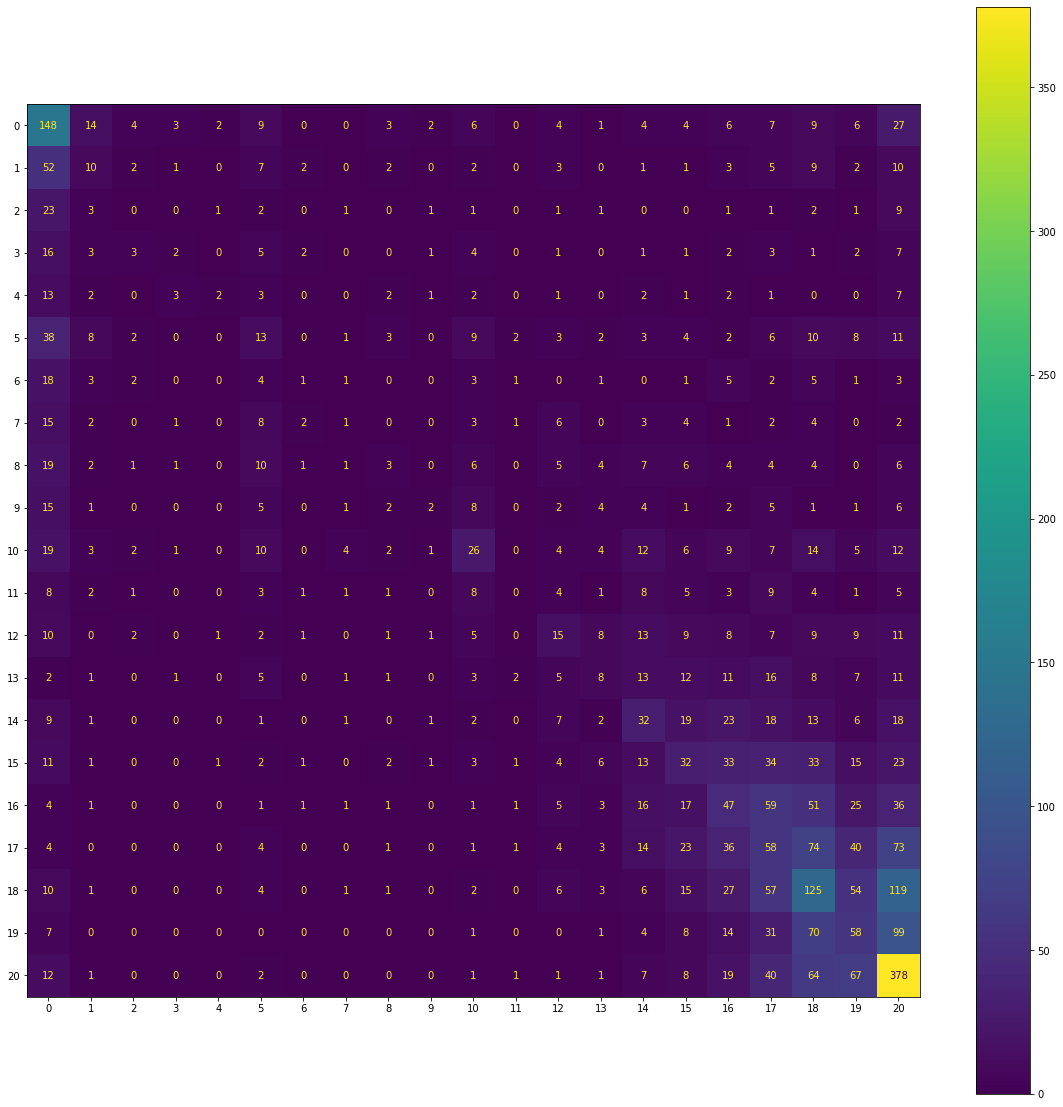

In [196]:
fig, ax = plt.subplots(figsize=(20, 20))
display.plot(ax=ax)

In [183]:
result = pd.DataFrame({"text": X_test,"y_pred": pred, "y_true": y_test})

In [184]:
result.to_csv("data/2_DTC_W2V.csv")